In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import helper
import matplotlib.pyplot as plt
import numpy as np

start=chr(0x900)                    # 0x900 is the unicode point of first character of hindi alphabet
end=chr(0x97F)                      # 0x900 is the unicode point of last character of hindi alphabet

vectorizer=CountVectorizer(token_pattern="["+start+"-"+end+"]+",min_df = 0,binary=True)
        
authors=os.listdir('Hindi_train')
files=helper.get_files(authors)


docs=[]
for file in files:
        doc = codecs.open(file, "r", encoding='utf-16')
        document=doc.read()
        docs+=[document]
        doc.close()

X=vectorizer.fit_transform(docs)
train_data_X=pd.DataFrame(data=X.toarray(),columns=vectorizer.get_feature_names())

            
        
        
#extracting words which have occured in  more than half of the documents i,e most frequent words
#The extracted words have a very high probability of being function words

sum=[]
columns=[]
for each in train_data_X.columns:
                sum_of_values=train_data_X[each].sum()
                sum=sum+[sum_of_values]
                columns=columns+[each]

sum=pd.Series(data=sum,index=columns)
cut_off=train_data_X.shape[0]

base=2

length=[]

while (base <= 10):
    print(base)
    function_words=sum[sum>(cut_off*(base/10))]    #cut off frequency i,e percentage of total documents the word appeared. Here we set to 50%.
    length+=[len(function_words)]
    file=open('frequency '+ str(base),'w')
    function_words=[str(x) for x in function_words.index]
    function_words=",".join(function_words)
    file.write(function_words)
    file.close()
    base+=1










2
3
4
5
6
7
8
9
10


In [45]:
print(length)

[288, 177, 122, 85, 58, 34, 22, 18, 0]


In [50]:
previous=[]

base='frequency '
number_of_words=[]
cut_off=[]
value=10
while(value>1):
    cut_off+=[value/10]
    
    print('cut_off='+str(value/10))
    file=open(base+str(value),'r')
    current=file.read()
    if current:
        current=current.split(',')
        cur_length=len(current)
    else:
        cur_length=0
        
    number_of_words+=[cur_length]
    print('total words='+str(cur_length))
    for each in current:                           #going to show only new words which appear on decreasing cutoff
        if each not in previous:
            print(each,end=' ')
    
    file.close()
    previous=current
    value-=1
    print("")
        
    

    

cut_off=1.0
total words=0

cut_off=0.9
total words=18
इस एक और कर का कि की के को तो नहीं पर भी में से ही है हो 
cut_off=0.8
total words=22
अपने जो लिए हैं 
cut_off=0.7
total words=34
करने किसी कुछ कोई जब तक था ने बाद यह रहे साथ 
cut_off=0.6
total words=58
अपनी अब आप उस उसे करते किया क्या गया तरह न पहले बहुत बात या ये रहा रही लेकिन हम हर हुए होता होने 
cut_off=0.5
total words=85
अगर आज उनके उसके ऐसा कई करना जा जाता जैसे थी थे दिन दिया फिर बार मैं लोग लोगों वह वाले वो सकता समय हुआ होती होते 
cut_off=0.4
total words=122
अपना आ आपको इन इसके इसलिए इसी उन उनकी उन्हें उसकी ऐसे कभी करता कहा काम गई जाती जाते जाने तब दे दो नाम पास यही लगा ले लेकर वे सकते सब सभी हुई हैं। है। होगा 
cut_off=0.3
total words=177
अभी अलग आगे आने इतना इसका इसे उसका उसी ऐसी कम करती कहीं कैसे क्यों क्योंकि खुद गए घर चल चाहिए जिस जीवन था। दी दुनिया दूर देते देने देश दोनों पता पूरा पूरी बन बना बस बारे मन मुझे याद रूप लगे लिया वही वाला वाली सकती सबसे सही साल सिर्फ हमारे हमें होगी 
cut_off=0.2
total words=288
अच्छा अच्छी अधि

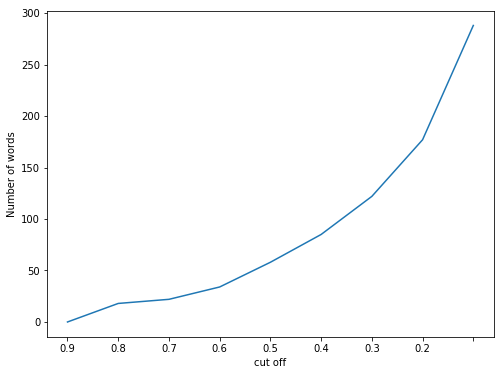

In [79]:
number_of_function_words

array([  0,  17,  20,  28,  48,  69,  90, 113, 155])

In [80]:
number_of_non_function_words

array([  0,   1,   2,   6,  10,  16,  32,  64, 133])

In [81]:
useful_ratio=number_of_function_words/np.array(number_of_words)

/home/kishanku56/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [83]:
useful_ratio[0]=0

In [84]:
useful_ratio

array([0.        , 0.94444444, 0.90909091, 0.82352941, 0.82758621,
       0.81176471, 0.73770492, 0.63841808, 0.53819444])

In [87]:
error_ratio=number_of_non_function_words/np.array(number_of_words)

/home/kishanku56/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [88]:
error_ratio[0]=0

In [89]:
error_ratio

array([0.        , 0.05555556, 0.09090909, 0.17647059, 0.17241379,
       0.18823529, 0.26229508, 0.36158192, 0.46180556])

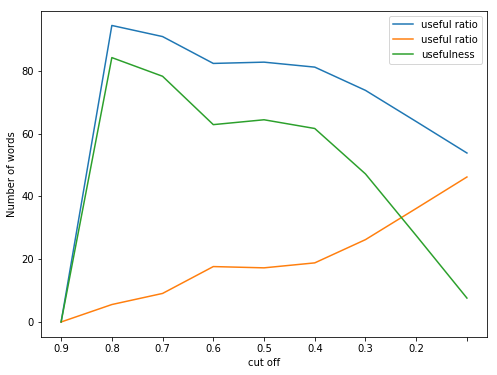

In [95]:


# Plot the figure.
plt.figure(figsize=(8,6))




# number_of_function_words counted manually

number_of_non_function_words=np.array([0,1,2,6,10,16,32,64,133])

number_of_function_words=np.array(number_of_words)-number_of_non_function_words

   
freq_series = pd.Series.from_array(useful_ratio*100)

x_labels = cut_off
ax = freq_series.plot(label='useful ratio')
ax.set_xlabel('cut off')
ax.set_ylabel('Number of words')
ax.set_xticklabels(x_labels)
ax.legend()

freq_series = pd.Series.from_array(error_ratio*100)

x_labels = cut_off
ax = freq_series.plot(label='useful ratio')
ax.legend()

usefulness=((number_of_function_words-number_of_non_function_words)/(number_of_words+1))*100
freq_series = pd.Series.from_array(usefulness)

x_labels = cut_off
ax = freq_series.plot(label='usefulness')
ax.legend()

plt.savefig('total words')


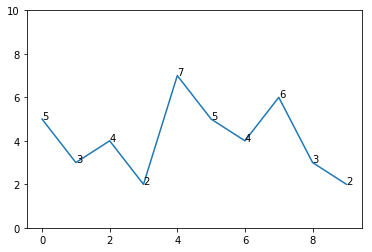

In [96]:
import numpy
from matplotlib import pyplot

x = numpy.arange(10)
y = numpy.array([5,3,4,2,7,5,4,6,3,2])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0,10)
pyplot.plot(x,y)
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))

pyplot.show()
